# Data Manipulation

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
 # leetcode medium string compression
    

# Possible Affirm 

# Given a list of strings, find the smallest unique substring for each string.


In [5]:
# Given a list of strings, find the smallest unique substring for each string.

lst = ["hello", "world", "apple", "banana", "cat", "dog", "moon", "sun", "rainbow"]

[len(set(x)) for x in lst]

def smallest_uniq_substring(lst):
    
    lst_item_uniq_cnt = [len(set(x)) for x in lst]
    min_uniq_cnt = float('inf')
    min_uniq_idx = -1
    
    min_uniq_ct_list = []
    min_uniq_idx_list = []

    for idx, word in enumerate(lst):
        # print('idx',idx)
        uniq_char = set(word)
        uniq_cnt = len(uniq_char)
    
        if uniq_cnt < min_uniq_cnt:
            min_uniq_cnt = uniq_cnt
            
    idx_has_min_uniq_ct = [index for index, cnt in enumerate(lst_item_uniq_cnt) if cnt == min_uniq_cnt]
    return(idx_has_min_uniq_ct)
            
index_has_min_uniq_ct = smallest_uniq_substring(lst)
print(index_has_min_uniq_ct)
[lst[idx] for idx in index_has_min_uniq_ct]
# print(index_has_min_uniq_ct)

[3, 4, 5, 6, 7]


['banana', 'cat', 'dog', 'moon', 'sun']

In [4]:
[len(set(x)) for x in lst]


[4, 5, 4, 3, 3, 3, 3, 3, 7]

# join all these objects together by user_id and convert into df? then try to feature engineer later for ML


In [5]:
# join all these objects together by user_id and convert into df? then try to feature engineer later for ML

# column_info = [
#     {"user_id": int},
#     {"age": int},
#     {"gender": str},
#     {"income": float},
#     {"credit_score": int},
#     {"fraud_label": str}
# ]

# data = [
#     [1, 35, "Male", 50000.0, 700, "Not Fraud"],
#     [2, 45, "Female", 60000.0, 720, "Not Fraud"],
#     [3, 30, "Male", 45000.0, 680, "Fraud"],
#     [4, 50, "Male", 70000.0, 750, "Not Fraud"],
#     [5, 40, "Female", 55000.0, 710, "Fraud"]
# ]

# user_labels = [
#     [1, "Not Fraud"],
#     [2, "Not Fraud"],
#     [3, "Fraud"],
#     [4, "Not Fraud"],
#     [5, "Fraud"]
# ]


column_info = [
    {"user_id": int},
    {"age": int},
    {"gender": str},
    {"income": float},
    {"credit_score": int},
]

data = [
    [1, 35, "Male", 50000.0, 700,],
    [2, 45, "Female", 60000.0, 720,],
    [3, 30, "Male", 45000.0, 680, ],
    [4, 50, "Male", 70000.0, 750, ],
    [5, 40, "Female", 55000.0, 710,]
]

user_labels = [
    [1, "Not Fraud"],
    [2, "Not Fraud"],
    [3, "Fraud"],
    [4, "Not Fraud"],
    [5, "Fraud"]
]

In [6]:
# simple create_df without data transformation
def create_df(column_info, data, user_labels):
    
    rows = []
    
    # i = 5
    for i in range(len(data)):
        
        row = {}
        # j = 5
        for j in range(len(column_info)):
            
            col_name =  list(column_info[j].keys())[0]
            row[col_name] = data[i][j]
            # print(col_name)
            # print(data[i][j])
            
        
        row['user_id'] = user_labels[i][0]
        row['label'] = user_labels[i][1]       

        print(row)
        rows.append(row)
    
    
    return(rows)

list_dict = create_df(column_info, data, user_labels)


# return a list of dictionary; list_dict
print(list_dict)
df = pd.DataFrame(list_dict)
df

{'user_id': 1, 'age': 35, 'gender': 'Male', 'income': 50000.0, 'credit_score': 700, 'label': 'Not Fraud'}
{'user_id': 2, 'age': 45, 'gender': 'Female', 'income': 60000.0, 'credit_score': 720, 'label': 'Not Fraud'}
{'user_id': 3, 'age': 30, 'gender': 'Male', 'income': 45000.0, 'credit_score': 680, 'label': 'Fraud'}
{'user_id': 4, 'age': 50, 'gender': 'Male', 'income': 70000.0, 'credit_score': 750, 'label': 'Not Fraud'}
{'user_id': 5, 'age': 40, 'gender': 'Female', 'income': 55000.0, 'credit_score': 710, 'label': 'Fraud'}
[{'user_id': 1, 'age': 35, 'gender': 'Male', 'income': 50000.0, 'credit_score': 700, 'label': 'Not Fraud'}, {'user_id': 2, 'age': 45, 'gender': 'Female', 'income': 60000.0, 'credit_score': 720, 'label': 'Not Fraud'}, {'user_id': 3, 'age': 30, 'gender': 'Male', 'income': 45000.0, 'credit_score': 680, 'label': 'Fraud'}, {'user_id': 4, 'age': 50, 'gender': 'Male', 'income': 70000.0, 'credit_score': 750, 'label': 'Not Fraud'}, {'user_id': 5, 'age': 40, 'gender': 'Female', '

,user_id,age,gender,income,credit_score,label
0,1,35,Male,50000.0,700,Not Fraud
1,2,45,Female,60000.0,720,Not Fraud
2,3,30,Male,45000.0,680,Fraud
3,4,50,Male,70000.0,750,Not Fraud
4,5,40,Female,55000.0,710,Fraud


#  create_df with  data transformation using z-score-norm & one-hot-encoding function ready for logistics regression


In [7]:
def z_score_normalization(data):
    mean = sum(data) / len(data)
    # print(mean)
    stdev = (sum((x-mean) **2 for x in data) /len(data)) **0.5
    # print(stdev)
    data_norm = [( x-mean) /stdev for x in data]
    # print(data_norm)
    return(data_norm)


def one_hot_encode(data):
    unique_values = set(data)
    # print('unique_values', unique_values)
    encoding = {}
    
    for i, value in enumerate(unique_values):
        # print('i',i)
        # print('value',value)

        # this is the formula to create binary for every possible uniq class (one-hot encoding)
        encoding[value] = [0] *i + [1]+[0]* (len(unique_values) - i - 1)
        # print('encoding[value]',encoding[value])
    # print('encoding', encoding)
    encoded_data = [ encoding[value]  for value in data]
    return(encoded_data)
           

In [8]:
# j
 # list of dictionary/json
column_info = [
    {"user_id": int},
    {"age": int},
    {"gender": str},
    {"income": float},
    {"credit_score": int},
]

# i 
# list of list
# data = [
#     [1, 35, "Male", 50000.0, 700,],
#     [2, 45, "Female", 60000.0, 720,],
#     [3, 30, "Male", 45000.0, 680, ],
#     [4, 50, "Male", 70000.0, 750, ],
#     [5, 40, "Female", 55000.0, 710,]
# ]

data = [
    [1, 35, "Male", 50000.0, 700,],
    [2, 45, "Mix", 60000.0, 720,],
    [3, 30, "Male", 45000.0, 680, ],
    [4, 50, "Mix", 70000.0, 750, ],
    [5, 40, "Female", 55000.0, 710,]
]

user_labels = [
    [1, "Not Fraud"],
    [2, "Not Fraud"],
    [3, "Fraud"],
    [4, "Not Fraud"],
    [5, "Fraud"]
]

In [243]:

#  create_df with  data transformation uusing z-score-norm & one-hot-encoding function

def create_df_normalized(column_info, data, user_labels):
    rows = []
    rows_values = []
    for i in range(len(data)):
        row = {}
        # row_values =[]
        for j, column_dict in enumerate(column_info):
            col_name = list(column_dict.keys())[0]
            col_type = list(column_dict.values())[0]
            col_data = data[j][i]
            # print('col_data',col_data)
            # print('col_name',col_name)
            # print('col_type',col_type)

            if (col_type == int or col_type == float) and col_name != 'user_id':
                col_data_norm = z_score_normalization([entry[j] for entry in data])
            elif col_type == str:
                col_data_norm = one_hot_encode([entry[j] for entry in data])
                # print(col_data_norm)
            else:
                continue
           
            # print(col_data_norm)
            # print('col_data_norm[i]',col_data_norm[i])
            row[col_name] = col_data_norm[i]
            # print('row[col_name]', row[col_name])
        row['user_id'] = user_labels[i][0]
        # directly change label from categorical to binary
        row['label'] = 1 if user_labels[i][1] == 'Fraud' else 0

        # print(row['label'])
        print('row', row)
        # rows are list of dictionary because it retains both key:value pairs for all featurrs per record
        rows.append(row)
        flat_list = []
        _ = [flat_list.extend(flatten(x)) if isinstance(x, list) else flat_list.append(x) for x in list(row.values())]
        print(flat_list)
        # rows_values is nested list here because we only need records features values
        rows_values.append(flat_list)

        print("*" * 100)

    return(rows, rows_values)

list_dict, list_values = create_df_normalized(column_info, data, user_labels)
print("*" * 100)
print('list of dictionary contain key:val as colname:colvalue\n')
print(list_dict)
print("*" * 100)
print('nested list contain only values of all featurs for all records\n')
print(list_values)


df = pd.DataFrame(list_dict)
df


row {'age': -0.7071067811865475, 'gender': [0, 1, 0], 'income': -0.6974858324629157, 'credit_score': -0.5183210553488161, 'user_id': 1, 'label': 0}
[-0.7071067811865475, 0, 1, 0, -0.6974858324629157, -0.5183210553488161, 1, 0]
****************************************************************************************************
row {'age': 0.7071067811865475, 'gender': [1, 0, 0], 'income': 0.46499055497527714, 'credit_score': 0.34554737023254406, 'user_id': 2, 'label': 0}
[0.7071067811865475, 1, 0, 0, 0.46499055497527714, 0.34554737023254406, 2, 0]
****************************************************************************************************
row {'age': -1.414213562373095, 'gender': [0, 1, 0], 'income': -1.278724026182012, 'credit_score': -1.3821894809301762, 'user_id': 3, 'label': 1}
[-1.414213562373095, 0, 1, 0, -1.278724026182012, -1.3821894809301762, 3, 1]
****************************************************************************************************
row {'age': 1.41421356

,age,gender,income,credit_score,user_id,label
0,-0.707107,"[0, 1, 0]",-0.697486,-0.518321,1,0
1,0.707107,"[1, 0, 0]",0.464991,0.345547,2,0
2,-1.414214,"[0, 1, 0]",-1.278724,-1.382189,3,1
3,1.414214,"[1, 0, 0]",1.627467,1.641350,4,0
4,0.000000,"[0, 0, 1]",-0.116248,-0.086387,5,1


#  join list of dictionary/json & list of lists & convert to ALL numerical features value when necessary for logistic regression
### This means that date / datetime / boolean / string all need to convert differently that can convert into all numerical
### output: nested list which list items are numerical values of input features (from original /converted columns) 

In [191]:
#3 give a list of dictionary /json with type and colname speccification and list of lists for record features values, 
# also a dictionary for label of the data; make a final output which are list of lists of all nbr presenting featurs capable of having in logistic regression

param_schema = [
    {"type": "ID", "name": "user_id"},
    {"type": "Date", "name": "registration_date"},
    {"type": "DateTime", "name": "last_login"},
    {"type": "String", "name": "gender"},
    {"type": "Float", "name": "income"},
    {"type": "Integer", "name": "age"},
    {"type": "Boolean", "name": "is_fraud"}
]

training_data = [
    [1, "2022-01-01", "2022-01-10 08:30:00", "Male", 50000.0, 35, True],
    [2, "2022-01-02", "2022-01-11 09:45:00", "Female", 60000.0, 45, False],
    [3, "2022-01-03", "2022-01-12 10:00:00", "Male", 45000.0, 30, True],
    [4, "2022-01-04", "2022-01-13 11:15:00", "Male", 70000.0, 50, False],
    [5, "2022-01-05", "2022-01-14 12:30:00", "Female", 55000.0, 40, True]
]

label_data = {"ID": True}

########################################################################################
# output_data = [
#     [1, 16436, 16436, 50000.0, 35, 1],
#     [2, 16437, 16437, 60000.0, 45, 0],
#     [3, 16438, 16438, 45000.0, 30, 1],
#     [4, 16439, 16439, 70000.0, 50, 0],
#     [5, 16440, 16440, 55000.0, 40, 1]
# ]



In [495]:
import datetime as dt

# ****************************************************************************************************************
# 
# this function convert date/datetime into numerical, categorical into binary /on-hot encoding, 
# the function allow capability of z-sore normalized for the right numerical 
# keep user_id as original in the first position of each nested list, convert categorical label into binary
# def create_df_all_numerical(param_schema, training_data, label_data):
#
# ****************************************************************************************************************
def create_df_all_numerical_norm(param_schema, training_data, label_data):
    rows = []
    
    rows_values = []
    # i  up to 5
    for i in range(len(training_data)):
        
        row = {}
        
        # j up to 7
        for j, columnn_dict in enumerate(param_schema):

            col_type = list(columnn_dict.values())[0]
            col_name = list(columnn_dict.values())[1]
            
            # this allow to get one column at a time from training_data
            col_data = [entry[j] for entry in training_data]

            # the three if-else are mutually exclusive so need to treat it as a group of if-else conditions tgt
            if col_type == 'Date':
                # col_data = dt.datetime.strptime(col_data, '%Y-%m-%d').timestamp() *****
                col_data= [dt.datetime.strptime(x, '%Y-%m-%d').timestamp() for x in col_data]
                # z-score normalized numerical Date if needed
                col_data = z_score_normalization(col_data)

            elif col_type == 'DateTime':
                col_data = [dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() for x in col_data]
                # z-score normalized numerical DateTime if needed *****
                col_data = z_score_normalization(col_data)

                # print('col_data',col_data)
            # z-score normalized numerical if needed  *****
            elif (col_type == 'Integer' or col_type == 'Float'):
                col_data = z_score_normalization(col_data)
                # print(col_data)

#                 # print('col_data',col_data)

            elif col_type == "Boolean":
                col_data = [1 if x == True else 0  for x in col_data]

            elif col_type == 'String':
                col_data = one_hot_encode(col_data)
            row[col_name] = col_data[i]

        # this block try to only obtain all value from all key and output individually
        row_values = list(row.values())    
        flat_list = []   
        # underscore "-" is used as placeholder when you need to perform operation on each element without actually ref to the element itself
        # usually list comprehension is for create list, not for extend() or append() which is done here.
        _ = [ flat_list.extend(flatten(x)) if isinstance(x,list) else flat_list.append(x) for x in row_values]

        # rows contains items of dictionary which key:value are colname:colvalue pair              
        rows.append(row)
        rows_values.append(flat_list)
        # rows_values.append(row_values)   #just use row_values if want the unflatten version of all values in nested list

    print('*' *100)
    return(rows, rows_values)

list_dict , list_values = create_df_all_numerical_norm(param_schema, training_data, label_data)

print('list_dict\n',list_dict)
print('*' *100)
print('list_values flatten on one-hot feature \n', list_values)
print('*' *100)

# df = pd.DataFrame(list_dict)
# df

****************************************************************************************************
list_dict
 [{'user_id': 1, 'registration_date': -1.4142135623730951, 'last_login': -1.4141794863063688, 'gender': [1, 0], 'income': -0.6974858324629157, 'age': -0.7071067811865475, 'is_fraud': 1}, {'user_id': 2, 'registration_date': -0.7071067811865476, 'last_login': -0.6985876620731862, 'gender': [0, 1], 'income': 0.46499055497527714, 'age': 0.7071067811865475, 'is_fraud': 0}, {'user_id': 3, 'registration_date': 0.0, 'last_login': -0.011336108106664279, 'gender': [1, 0], 'income': -1.278724026182012, 'age': -1.414213562373095, 'is_fraud': 1}, {'user_id': 4, 'registration_date': 0.7071067811865476, 'last_login': 0.7042557161265184, 'gender': [1, 0], 'income': 1.62746694241347, 'age': 1.414213562373095, 'is_fraud': 0}, {'user_id': 5, 'registration_date': 1.4142135623730951, 'last_login': 1.419847540359701, 'gender': [0, 1], 'income': -0.11624763874381928, 'age': 0.0, 'is_fraud': 1}]
****

In [507]:
# sample input data
param_schema = [
    {"type": "ID", "name": "user_id"},
    {"type": "Date", "name": "registration_date"},
    {"type": "DateTime", "name": "last_login"},
    {"type": "String", "name": "gender"},
    {"type": "Float", "name": "income"},
    {"type": "Integer", "name": "age"},
    {"type": "Boolean", "name": "is_fraud"}
]

training_data = [
    [1, "2022-01-01", "2022-01-10 08:30:00", "Male", 50000.0, 35, True],
    [2, "2022-01-02", "2022-01-11 09:45:00", "Female", 60000.0, 45, False],
    [3, "2022-01-03", "2022-01-12 10:00:00", "Male", 45000.0, 30, True],
    [4, "2022-01-04", "2022-01-13 11:15:00", "Male", 70000.0, 50, False],
    [5, "2022-01-05", "2022-01-14 12:30:00", "Female", 55000.0, 40, True]
]

label_data = {"ID": True}


# sample output data
# ****************************************************************************************************
# list_dict
#  [{'user_id': 1, 'registration_date': -1.4142135623730951, 'last_login': -1.4141794863063688, 'gender': [1, 0], 'income': -0.6974858324629157, 'age': -0.7071067811865475, 'is_fraud': 1}, {'user_id': 2, 'registration_date': -0.7071067811865476, 'last_login': -0.6985876620731862, 'gender': [0, 1], 'income': 0.46499055497527714, 'age': 0.7071067811865475, 'is_fraud': 0}, {'user_id': 3, 'registration_date': 0.0, 'last_login': -0.011336108106664279, 'gender': [1, 0], 'income': -1.278724026182012, 'age': -1.414213562373095, 'is_fraud': 1}, {'user_id': 4, 'registration_date': 0.7071067811865476, 'last_login': 0.7042557161265184, 'gender': [1, 0], 'income': 1.62746694241347, 'age': 1.414213562373095, 'is_fraud': 0}, {'user_id': 5, 'registration_date': 1.4142135623730951, 'last_login': 1.419847540359701, 'gender': [0, 1], 'income': -0.11624763874381928, 'age': 0.0, 'is_fraud': 1}]
# ****************************************************************************************************
# list_values flatten on one-hot feature 
#  [[1, -1.4142135623730951, -1.4141794863063688, 1, 0, -0.6974858324629157, -0.7071067811865475, 1], [2, -0.7071067811865476, -0.6985876620731862, 0, 1, 0.46499055497527714, 0.7071067811865475, 0], [3, 0.0, -0.011336108106664279, 1, 0, -1.278724026182012, -1.414213562373095, 1], [4, 0.7071067811865476, 0.7042557161265184, 1, 0, 1.62746694241347, 1.414213562373095, 0], [5, 1.4142135623730951, 1.419847540359701, 0, 1, -0.11624763874381928, 0.0, 1]]
# ****************************************************************************************************


def z_score_normalization(data):
    mean = sum(data) / len(data)
    stdev = (sum((x-mean) **2 for x in data) /len(data)) **0.5
    data_norm = [( x-mean) /stdev for x in data]
    return(data_norm)


def one_hot_encode(data):
    # understand how many possible unique class levels
    unique_values = set(data)
    encoding = {}
    for i, value in enumerate(unique_values):
        # this is the formula to create binary for every possible uniq class (one-hot encoding)
        encoding[value] = [0] *i + [1]+[0]* (len(unique_values) - i - 1)
    # for every item in the data list, convert each into respective binary encoding based on encoding dict just createdd
    encoded_data = [ encoding[value]  for value in data]
    return(encoded_data)
           
def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list  

import datetime as dt
# ****************************************************************************************************************
# 
# this function convert date/datetime into numerical, categorical into binary /on-hot encoding, 
# the function allow capability of z-sore normalized for the right numerical 
# keep user_id as original in the first position of each nested list, convert categorical label into binary
# def create_df_all_numerical(param_schema, training_data, label_data):
#
# ****************************************************************************************************************
def data_preprocess_binary_classification(param_schema, training_data, label_data):
    rows = []
    
    rows_values = []
    # i  up to 5
    for i in range(len(training_data)):
        
        row = {}
        
        # j up to 7
        for j, columnn_dict in enumerate(param_schema):

            col_type = list(columnn_dict.values())[0]
            col_name = list(columnn_dict.values())[1]
            
            # this allow to get one column at a time from training_data
            col_data = [entry[j] for entry in training_data]

            # the three if-else are mutually exclusive so need to treat it as a group of if-else conditions tgt
            if col_type == 'Date':
                # col_data = dt.datetime.strptime(col_data, '%Y-%m-%d').timestamp() *****
                col_data= [dt.datetime.strptime(x, '%Y-%m-%d').timestamp() for x in col_data]
                # z-score normalized numerical Date if needed
                col_data = z_score_normalization(col_data)

            elif col_type == 'DateTime':
                col_data = [dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() for x in col_data]
                # z-score normalized numerical DateTime if needed *****
                col_data = z_score_normalization(col_data)

                # print('col_data',col_data)
            # z-score normalized numerical if needed  *****
            elif (col_type == 'Integer' or col_type == 'Float'):
                col_data = z_score_normalization(col_data)
                # print(col_data)

#                 # print('col_data',col_data)

            elif col_type == "Boolean":
                col_data = [1 if x == True else 0  for x in col_data]

            elif col_type == 'String':
                col_data = one_hot_encode(col_data)
            row[col_name] = col_data[i]

        # this block try to only obtain all value from all key and output individually
        row_values = list(row.values())    
        flat_list = []   
        # underscore "-" is used as placeholder when you need to perform operation on each element without actually ref to the element itself
        # usually list comprehension is for create list, not for extend() or append() which is done here.
        _ = [ flat_list.extend(flatten(x)) if isinstance(x,list) else flat_list.append(x) for x in row_values]

        # rows contains items of dictionary which key:value are colname:colvalue pair              
        rows.append(row)
        rows_values.append(flat_list)
        # rows_values.append(row_values)   #just use row_values if want the unflatten version of all values in nested list

    print('*' *100)
    return(rows, rows_values)

list_dict , list_values = data_preprocess_binary_classification(param_schema, training_data, label_data)

print('list_dict\n',list_dict)
print('*' *100)
print('list_values flatten on one-hot feature \n', list_values)
print('*' *100)


****************************************************************************************************
list_dict
 [{'user_id': 1, 'registration_date': -1.4142135623730951, 'last_login': -1.4141794863063688, 'gender': [1, 0], 'income': -0.6974858324629157, 'age': -0.7071067811865475, 'is_fraud': 1}, {'user_id': 2, 'registration_date': -0.7071067811865476, 'last_login': -0.6985876620731862, 'gender': [0, 1], 'income': 0.46499055497527714, 'age': 0.7071067811865475, 'is_fraud': 0}, {'user_id': 3, 'registration_date': 0.0, 'last_login': -0.011336108106664279, 'gender': [1, 0], 'income': -1.278724026182012, 'age': -1.414213562373095, 'is_fraud': 1}, {'user_id': 4, 'registration_date': 0.7071067811865476, 'last_login': 0.7042557161265184, 'gender': [1, 0], 'income': 1.62746694241347, 'age': 1.414213562373095, 'is_fraud': 0}, {'user_id': 5, 'registration_date': 1.4142135623730951, 'last_login': 1.419847540359701, 'gender': [0, 1], 'income': -0.11624763874381928, 'age': 0.0, 'is_fraud': 1}]
****

In [7]:
import random


# Sift Science

In [8]:
actual_label = [random.randint(0,1) for _ in range(1000)]
pred_label = [random.randint(0,1) for _ in range(1000)]


In [9]:
# actual interview problem: given a list vectors, the actual label vs. the pred label, try to figure out the
# precision, recall and f1 score for model evaluation metrics iin binary classification

# actual_label = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
# pred_label =   [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
# pred_label = [1, 0, 1, 0, 1, 1, 0, 1, 1]

def eval_model_binary_classification(actual_label, pred_label ):
    
    if len(actual_label) != len(pred_label):
        print('Two input label vectors are of different length! Exit function and please validate data!')
        return(None, None, None)
    
    else:
        tp = fp = tn = fn = 0
        for actual, pred in zip(actual_label, pred_label):
            if actual == 1 and actual == pred:
                tp += 1
            elif actual == 1 and actual != pred:
                fn += 1
            elif actual == 0 and  actual == pred:
                tn += 1
            else:
                fp += 1
        
        print(tp, fp, tn, fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 *  precision * recall) / (precision + recall)
        
        print(actual, pred)
        
        
        return( precision, recall, f1)


precision, recall, f1 = eval_model_binary_classification(actual_label, pred_label)

print('precision, recell and f1 scores are:', precision, recall, f1)

286 251 223 240
1 1
precision, recell and f1 scores are: 0.5325884543761639 0.5437262357414449 0.5380997177798683


In [10]:
# actual interview problem: given a list vectors, the actual label vs. the pred label, try to figure out the
# precision, recall and f1 score for model evaluation metrics iin binary classification

# actual_label = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
# pred_label =   [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
# pred_label = [1, 0, 1, 0, 1, 1, 0, 1, 1]

def eval_model_binary_classification(actual_label, pred_label ):
    
    if len(actual_label) != len(pred_label):
        print('Two input label vectors are of different length! Exit function and please validate data!')
        return(None, None, None)
    
    else:
        tp = fp = tn = fn = 0
        for actual, pred in zip(actual_label, pred_label):
            if actual == 1 and actual == pred:
                tp += 1
            elif actual == 1 and actual != pred:
                fn += 1
            elif actual == 0 and  actual == pred:
                tn += 1
            else:
                fp += 1
        
        print(tp, fp, tn, fn)
        accuracy = (tp + tn) / (tp + fp + tn + fn)
        error = 1 - accuracy
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        tpr = recall = sensitivity
        fpr = fp / (tn + fp)   # 1 - specificity
        precision = tp / (tp + fp)
        # recall = tp / (tp + fn)
        f1 = (2 *  precision * recall) / (precision + recall)
        
        print(actual, pred)
        
        
        return( accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1)


accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1 = eval_model_binary_classification(actual_label, pred_label)

print('accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, and f1scores are:\n', accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1)

286 251 223 240
1 1
accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, and f1scores are:
 0.509 0.491 0.5437262357414449 0.4704641350210971 0.5437262357414449 0.5295358649789029 0.5325884543761639 0.5437262357414449 0.5380997177798683


In [11]:
actual_label = [random.randint(0,1) for _ in range(1000)]
pred_label = [random.randint(0,1000) for _ in range(1000)]


In [12]:
actual_label[:20]

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]

In [13]:
pred_label[:20]

[455,
 272,
 327,
 529,
 745,
 224,
 60,
 381,
 639,
 990,
 465,
 846,
 431,
 653,
 315,
 738,
 125,
 420,
 785,
 899]

In [41]:
thresholds = list(range(0,1001,50))
thresholds

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000]

In [23]:
# plt.hist(pred_label)
         

In [43]:
# actual_label = [random.randint(0,1) for _ in range(1000)]
# pred_label = [random.randint(0,1000) for _ in range(1000)]

# actual interview problem: given a list vectors, the actual label vs. the pred label, try to figure out the
# precision, recall and f1 score for model evaluation metrics iin binary classification

# actual_label = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
# pred_label =   [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
# pred_label = [1, 0, 1, 0, 1, 1, 0, 1, 1]

thresholds = list(range(0,1001,50))

def eval_model_binary_classification(actual_label, pred_score ,thresholds):
    
    if len(actual_label) != len(pred_score):
        print('Two input vectors are of different length! Exit function and please validate data!')
        return(None, None, None)
    
    else:

        alert_rate_list = []; tp_list = []; fp_list = []; tn_list = []; fn_list = [];
        accuracy_list = []; err_list = []; precision_list = []; recall_list = [];
        sensitivity_list = []; specificity_list = []; tpr_list = []; fpr_list = []; f1_list = []
        
        # convert pred_score in numerical to pred_label in binary based on thresholds
        for threshold in thresholds:
            # print(threshold)
            
            tp = fp = tn = fn = 0
            # accuracy = error = sensitivity = specificity = tpr = fpr = precision = recall = f1 = 0
            
            pred_label = [ 1 if score >= threshold else 0 for score in pred_score]
            
            alert_rate = sum(pred_label) / len(pred_label)
            
            alert_rate_list.append(alert_rate)
            
            # print(pred_label[:10])
            
            for actual, pred in zip(actual_label, pred_label):
                if actual == 1 and actual == pred:
                    tp += 1
                elif actual == 1 and actual != pred:
                    fn += 1
                elif actual == 0 and  actual == pred:
                    tn += 1
                else:
                    fp += 1

            print(tp, fp, tn, fn)
            accuracy = (tp + tn) / (tp + fp + tn + fn)
            error = 1 - accuracy
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            tpr = recall = sensitivity
            fpr = fp / (tn + fp)   # 1 - specificity
            precision = tp / (tp + fp)
            # recall = tp / (tp + fn)
            f1 = (2 *  precision * recall) / (precision + recall)

            # print(actual, pred)
            # print( accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1)
            
            tp_list.append(tp)
            fp_list.append(fp)
            tn_list.append(tn)
            fn_list.append(fn)
            accuracy_list.append(accuracy)
            err_list.append(error)
            sensitivity_list.append(sensitivity)
            specificity_list.append(specificity)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

        # return( accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1)

        return(alert_rate_list,tp_list,fp_list,tn_list,fn_list,accuracy_list,err_list,sensitivity_list,specificity_list,tpr_list,fpr_list,precision_list,recall_list,f1_list)

alert_rate_list, tp_list,fp_list,tn_list,fn_list,accuracy_list,err_list,sensitivity_list,specificity_list,tpr_list,fpr_list,precision_list,recall_list,f1_list = eval_model_binary_classification(actual_label, pred_label,thresholds)

# print('accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, and f1scores are:\n', accuracy, error, sensitivity, specificity, tpr, fpr, precision, recall, f1)

520 480 0 0
485 458 22 35
451 433 47 69
425 415 65 95
402 387 93 118
380 368 112 140
356 342 138 164
332 324 156 188
305 293 187 215
279 266 214 241
255 241 239 265
225 227 253 295
192 206 274 328
170 176 304 350
144 160 320 376
112 141 339 408
93 115 365 427
70 87 393 450
52 57 423 468
26 28 452 494
1 1 479 519


In [44]:

data = {
        "threshold": thresholds,
        "alert_rate": alert_rate_list,
        "tp": tp_list,
        "fp": fp_list,
        "tn": tn_list,
        "fn": fn_list,
        "accuracy": accuracy_list ,
        "error": err_list,
        "sensitivity": sensitivity_list,
        "specificity": specificity_list,
        "tpr": tpr_list,
        "fpr": fpr_list,
        "precision": precision_list,
        "recall": recall_list,
        "f1": f1_list
}
df = pd.DataFrame(data)

df.shape

(21, 15)

In [45]:
df


,threshold,alert_rate,tp,fp,tn,fn,accuracy,error,sensitivity,specificity,tpr,fpr,precision,recall,f1
0,0,1.000,520,480,0,0,0.520,0.480,1.000000,0.000000,1.000000,1.000000,0.520000,1.000000,0.684211
1,50,0.943,485,458,22,35,0.507,0.493,0.932692,0.045833,0.932692,0.954167,0.514316,0.932692,0.663021
2,100,0.884,451,433,47,69,0.498,0.502,0.867308,0.097917,0.867308,0.902083,0.510181,0.867308,0.642450
3,150,0.840,425,415,65,95,0.490,0.510,0.817308,0.135417,0.817308,0.864583,0.505952,0.817308,0.625000
4,200,0.789,402,387,93,118,0.495,0.505,0.773077,0.193750,0.773077,0.806250,0.509506,0.773077,0.614209
5,250,0.748,380,368,112,140,0.492,0.508,0.730769,0.233333,0.730769,0.766667,0.508021,0.730769,0.599369
6,300,0.698,356,342,138,164,0.494,0.506,0.684615,0.287500,0.684615,0.712500,0.510029,0.684615,0.584565
7,350,0.656,332,324,156,188,0.488,0.512,0.638462,0.325000,0.638462,0.675000,0.506098,0.638462,0.564626
8,400,0.598,305,293,187,215,0.492,0.508,0.586538,0.389583,0.586538,0.610417,0.510033,0.586538,0.545617
9,450,0.545,279,266,214,241,0.493,0.507,0.536538,0.445833,0.536538,0.554167,0.511927,0.536538,0.523944


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


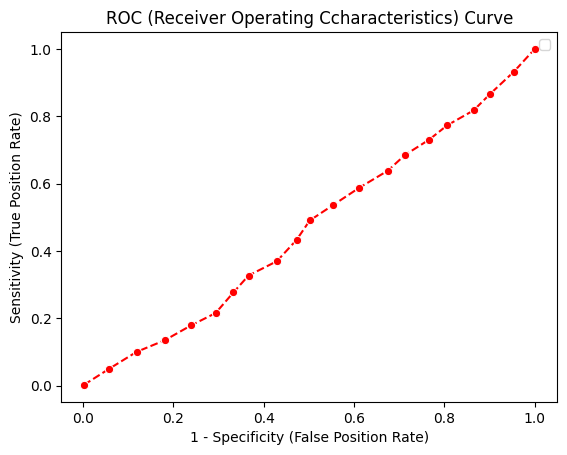

In [50]:

# data viz for ROC - binary classification model evaluation
sns.lineplot(x= fpr_list, y=tpr_list, color='red', marker='o', linestyle='--')
plt.legend()
plt.xlabel('1 - Specificity (False Position Rate)')
plt.ylabel('Sensitivity (True Position Rate)')
plt.title("ROC (Receiver Operating Ccharacteristics) Curve")
plt.show()



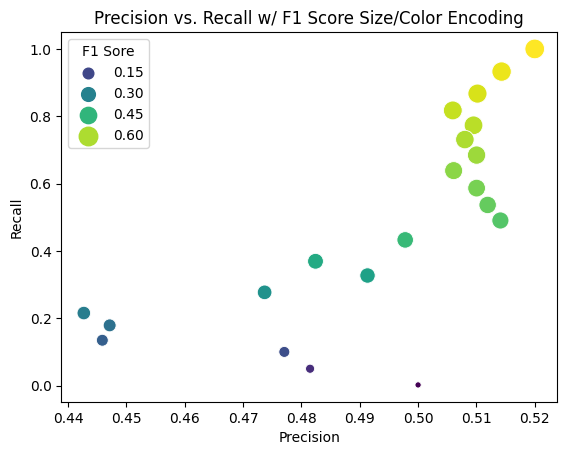

In [57]:
scatter = sns.scatterplot(x=precision_list, y=recall_list, 
                          size=f1_list, 
                          hue=f1_list, palette='viridis', sizes=(20, 200),
                         )


# Add x and y axis labels
plt.xlabel('Precision')
plt.ylabel('Recall')

# Add a title
plt.title('Precision vs. Recall w/ F1 Score Size/Color Encoding')

# Show the legend
plt.legend(title = 'F1 Sore')
plt.show()

In [269]:

# Fraudulent user detection, find weakly connected component in large graph
# (100k nodes, single machine). This question needs to be compiled and run on
# a mac.
# clarification on the expected definition of weakly connected components *****

# sample input: adjacency list of graph
graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3, 5],
    5: [4]
}

# sample output
[[1, 2, 3], [4, 5]]

# Breadth-First Search (BFS):
# Depth-First Search (DFS):
# use BFS or DFS to find weakly connected nodes group and have them together in every list item in a nested list:

from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    component = []
    
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            component.append(node)
            queue.extend(graph[node])
    return(component)


def find_weakly_connected_components(graph):
    visited = set()
    components = []
    
    for node in graph:
        if node not in visited:
            component = bfs(graph, node)
            components.append(component)
            visited.update(component)
            
    return(components)


weakly_connected_components = find_weakly_connected_components(graph)
print('BFS for weakly connected components, not excplicit on DISTINCT weakly connected components during traversal')
print(weakly_connected_components)


#####################################################################################################################
def dfs(graph, node, visited):
    component = []
    stack = [node]
    
    while stack:
        current_node = stack.pop()
        if current_node not in visited:
            visited.add(current_node)
            component.append(current_node)
            stack.extend([neighbor for neighbor in graph[current_node] if neighbor not in visited])
    return(component)

def find_weakly_connected_components(graph):
    visited = set()
    components = []
    
    for node in graph: 
        if node not in visited:
            component = dfs(graph, node, visited)
            components.append(component)
    return(components)

weakly_connected_components = find_weakly_connected_components(graph)
print('DFS for weakly connected components, not excplicit on DISTINCT weakly connected components during traversal')
print(weakly_connected_components)


#####################################################################################################################

# modify the traversal algorithms to handle the identification of separate weakly connected components explicitly.


BFS for weakly connected components, not excplicit on DISTINCT weakly connected components during traversal
[[1, 2, 3, 4, 5]]
DFS for weakly connected components, not excplicit on DISTINCT weakly connected components during traversal
[[1, 3, 4, 5, 2]]


In [270]:
# given a graph and a node in the graph, return a deep copy of the node

class Node:
    def __init__(self, val=None):
        self.val = val
        self.neighbors = []

# Create nodes
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

# Create edges
node1.neighbors.append(node2)
node1.neighbors.append(node4)
node2.neighbors.append(node1)
node2.neighbors.append(node3)
node3.neighbors.append(node2)
node3.neighbors.append(node4)
node4.neighbors.append(node1)
node4.neighbors.append(node3)

# Define the input node
input_node = node1

print(node1)
print(input_node)

In [454]:

# given an array of fruits, and another array of weights of fruits, write a function to pick the fruits 
# randomly with a probabilityy distribution equal to its weights

# random distributions:
# lognormal
# negative exponential
# gamma
# beta
# random.randint()

# Generate random numbers from a normal distribution
# np.random.normal(loc=0, scale=1, size=10)
# # Generate random numbers from a uniform distribution
# np.random.uniform(low=0, high=1, size=10)
# # Generate random numbers from a binomial distribution
# np.random.binomial(n=10, p=0.5, size=10)
# # Generate random numbers from a Poisson distribution
# np.random.poisson(lam=3, size=10)
# # Generate random numbers from an exponential distribution
# np.random.exponential(scale=1, size=10)

##############################################################################
# random.random()  any float b/w [0,1)
# random.randint(a, b) random integer b/w [a, b]
# random.uniform(a, b) random float b/w [a,b]

# shuffle(lst) shuffle the lst
# choice(lst)  random pick single item from lst
##############################################################################
# logics explain: bascially cumulative_weight acts as a CDF, which correlate AUC of the CDF for each fruits in ascending order of the fruit list, 
# the cumulative_weight value acts as the upper bound threshold respective to each fruit,lower bound of the AUC for that fruit will be the previous cumulative_weight 
# of last position fruits, so bascially to test if the rand_num is <= to any particular cumulative_weight value then output the respective fruit is to 
# indicate /pick the fruit based on the AUC/shade that belong to that fruit,  fruit contains bigger weight would yield higher AUC shade 
# of that fruit, so gives the bigger bandwidth for the rand_num to fall in
# the fruit with higher weight have higher chance of being chosen

fruits = ["apple", "banana", "orange", "pear"]
fruits_weight = [2,3,1,4]

from collections import Counter
import random

def pick_fruits(fruits, weights):
    
    total_weight = sum(weights)
    # print('total_weight',total_weight)
    # use uniform distribution b/w a,b in float, use float b/c prob is suppose to be PDF but not PMF here
    # b/c weights are all int so the cdf should construct in way that range b/w 0 and the sum of all weights
    rand_num = random.uniform(0,  total_weight)
    cumulative_weight = 0
    
    # print('rand_num',rand_num)
    
    for fruit, weight in zip(fruits, weights):
        # print(fruit, weight  )
        cumulative_weight += weight
        # print(cumulative_weight)
        
        if rand_num <= cumulative_weight:
            # print('OUT',fruit)
            return( fruit)
######################### SIMULATION ###########################################
# simulation to randomly generate a random fruit from the fruits X times based on the w/ prob dist on its weights
fruit_list = []
for i in range(2000):
    output = pick_fruits(fruits, fruits_weight)
    fruit_list.append(output)
     

# easy way to use the random.choices() func. instead
# fruit_list = random.choices(fruits, fruits_weight, k = 1000)
############################ VALIDATION #########################################################
# this is to check & confirm if the simulation is done right basd on the prob distribution using respective fruit weight
dist = Counter(fruit_list)
print(dist)
total = sum(dist.values())
fruit_prob = {}
for key, val in dist.items():
    prob = val/total
    fruit_prob[key] = prob

print(fruit_prob)
# fruits = ["apple", "banana", "orange", "pear"]
# fruits_weight = [2,3,1,4]


Counter({'pear': 856, 'banana': 570, 'apple': 400, 'orange': 174})
{'pear': 0.428, 'apple': 0.2, 'orange': 0.087, 'banana': 0.285}


In [463]:
# given a frequency distribution of objects, write a random object generator which produces objects based on their probability distribution

# in this prompt, the data structure of this sample input is different compare to last one
# because this obj already contain the associated prob for each items in the obj, so the obj in dictionary datatype might be more appropriate
# so the key:val pairs would you the paired info of individual obj and its respective prob. 

# sample input (population mean, prob distribution)
object_freq = {"A": 0.3, "B": 0.5, "C": 0.2}

import random 
from collections import Counter

def random_generator_by_obj_freq(object_freq):
    
    rand_num = random.random()
    # print(rand_num)
    # print(object_freq)
    cumulative_prob = 0
    
    for obj, prob in object_freq.items():
        
        cumulative_prob += prob
        # print(obj, obj)
        # print(cumulative_prob)
        if rand_num <= cumulative_prob:
            return(obj)

# when test the function and generate 1 value/obj at a time
obj = random_generator_by_obj_freq(object_freq)
print('single random object generator:\n', obj)

# as n --> large value,( nbr trials increase), the freq. of obj generation (sample mean) will converge to population mean
# as sample size increases, tthe observed freq. of an event will tend to approach to its true prob.
# why: b/c as sample size goes up, tthe effect of the randomness in the sampling process become less significant, the relative freq. of the obj.
# will more closely reflect their underlying prob.


# LLN focuses on the behavior of individual frequencies or proportions as the sample size increases, aiming to approximate the true probability distribution.
# CLT focuses on the distribution of sample means (or other sample statistics) as the sample size increases, predicting that they will approach a normal distribution.


# CLT - the distribution of sample mean of many sampling (MEAN OF MEANS) should approximate to Normal
# (Law of Large Number): relevant to generating random obj based on their prob. distribution
random_generate_obj_list = []
for i in range(10000):
    obj = random_generator_by_obj_freq(object_freq)
    random_generate_obj_list.append(obj)

# print(random_generate_obj_list)
# print(len( random_generate_obj_list))
obj_dist = Counter(random_generate_obj_list)
print(obj_dist)

total_cnt = sum(obj_dist.values())
validation = {}

for key, val in obj_dist.items():
    
    prob = val/ total_cnt
    validation[key] =prob

# validate if your func simulate random obj by obj prob. as expect
validation

single random object generator:
 C
Counter({'B': 5008, 'A': 3044, 'C': 1948})


{'B': 0.5008, 'C': 0.1948, 'A': 0.3044}

In [450]:
# Given 1 billion data point (key, value with 15 bytes of string and 8 byte
# of double value); store this in the memory that supports fast lookup.

In [489]:
# Evaluate an arithmetic expression that only involves multiplication and addition.

# sample input
expression = "3 + 4 * 2 * 5 + 6"

expression = "3 + 4 * 2 * 5  - 6"
expression = "1+1/1"

re.search(r"\*", expression)

import re

def evaluate_arithmetic(expression):
    
    expression = expression.replace(" ", "")
    
    print(expression)
    found = False 
    found_desired = 0
    found_undesired = 0
    for i in expression:
        print(i)
        if i in ['*','+']:
            found_desired += 1

        elif i in ['-', '/']:
            found_undesired += 1
    
    if found_desired > 0 and found_undesired == 0:
        found = True
    else:
        found = False
    
    print(found_desired,found_undesired)
    return(found)

evaluate_arithmetic(expression)



1+1/1
1
+
1
/
1
1 1


False

In [494]:
expression = "3 + 4 * 2 * 5 + 6"

expression = "3 + 4 * 2 * 5  - 6"
expression = "1+1*1"

pattern = r"[\+\*]"

match = re.search(pattern, expression)
print(match)


<re.Match object; span=(1, 2), match='+'>


In [ ]:
# TwoSum problem


In [433]:
# given a string, or a list of string items, see if they can be seperated to identify the Chemical elements eg. Na, Cl, Fe, Li
# also given a list of all chemical elements string items
# - recursive
# dp?


elements = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne","Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar",
            "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr",
            "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe",
            "Cs", "Ba", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn",
            "Fr", "Ra", "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]

# make elements lower case
elements_lower = [x.lower() for x in elements]
# Given a string, check if it could be decomposed into substring, which is
# each an element symbol. physics => P H Y Si C S
# Prompt: Given a string, check if it can be decomposed into substrings, each representing an element symbol.

# All match samples
input_string = "PHYSICS"
input_string = "PYTHON"

# partial match samples
# input_string = "XYLOPHONE"
# input_string = "ELEPHANT"
# input_string = "number"
# input_string = "GIRAFFE"
# input_string = "LANGUAGE"
# input_string = "HELLO"
# input_string = "WORLD"
# input_string = "CHEMISTRY"

# 
# # None match samples
# input_string = "ZERO"
# input_string = "JAVA"

# input_string = ""
# input_string = ""

# case-insentitive: now make the element list to be all lower cases, just match for case insensitive string match
def check_chemical_elements(elements, input_string):
    
    elements_found_list = []
    
    n = len(input_string)
    # print('n',n)
    for i in range(n):
        # print('i', i)
        for j in range(i+1, n+1):
            # print('j',j)
            substring = input_string[i:j]
            # print(substring)
            # depend on prompt is asking to match for case-sensitive/insensitive
            if substring.lower() in elements_lower:
            # if substring in elements:

                print(substring)
                elements_found_list.append(substring)
                continue
    
    if len(elements_found_list) > 1:
        found = True
    else:
        found = False
        elements_found_list = None
        print("*" *100)
        
    # return set() or list() depend on if duplicates matters
    # return(found, set(elements_found_list))
    return(found, elements_found_list)

element_existed_q, elements_found_list = check_chemical_elements(elements, input_string)
print('input_string:')
print(input_string)

print('element_existed_q:')
print(element_existed_q)

print('elements_found_list:')
print(elements_found_list)



P
Y
H
O
N
input_string:
PYTHON
element_existed_q:
True
elements_found_list:
['P', 'Y', 'H', 'O', 'N']


# study when additional time available

In [ ]:
# LESS POSSIBLEE

# do wordbreak
# one way is to use "dp" to do it
# another less ideal way is "backtracking"

In [ ]:
# LESS POSSIBLEE

# Given a binary search tree, find least common ancestor.


In [251]:

# level order transversal of a tree, 
# then make different between a shallow vs. deep copy

In [ ]:
# LESS POSSIBLEE

#  Given a binary tree with parent pointers (pointers that direct from leaves to the root), design an
# O(1) space complexity algorithm to find the lowest common ancestor of any two nodes.

In [256]:
# how to optimized an sorted array


In [248]:
# LeetCode original:
# LESS POSSIBLEE
# PopulationNext right pointers in each node II
# - Queue BFS
# - dual pointer

In [252]:
# LESS POSSIBLEE

# 1 given a nxn chessboard, there are only pawns (white and black) on it. Say
# one side is the start and its opposite side is the end. There is one white
# pawn on the start row, what are the cells that could be reached on the end
# side ---> but you have to understand the rule of the game first

In [253]:
# LESS POSSIBLEE
# given a binary tree, implement sibling (each nodes sibling is the next
# node of the same depth). Each node has a point called sibling initialized to
# null, implement a function such that all nodes' sibling pointer should have
# proper value.

In [ ]:
# Evaluate an arithmetic expression that only involves multiplication and addition.

# given an array of fruits, and another array of weights of fruits, write a function to pick the fruits randomly with a probabilityy distribution equal to its weights

# given a graph and a nodde in the graph, return a deep copy of the node

# given a frequency distribution of objects, write a random object generator which produces objects based on their probability distribution

# level order transversal of a tree, 
# then make different between a shallow vs. deep copy

# Given 1 billion data point (key, value with 15 bytes of string and 8 byte
# of double value); store this in the memory that supports fast lookup.


# Fraudulent user detection, find weakly connected component in large graph
# (100k nodes, single machine). This question needs to be compiled and run on
# a mac.

# Given a binary search tree, find least common ancestor.

#  Given a binary tree with parent pointers (pointers that direct from leaves to the root), design an
# O(1) space complexity algorithm to find the lowest common ancestor of any two nodes.


# Evaluate an arithmetic expression that only involves multiplication and addition.

# PopulationNext right pointers in each node II

# given a binary tree, implement sibling (each nodes sibling is the next
# node of the same depth). Each node has a point called sibling initialized to
# null, implement a function such that all nodes' sibling pointer should have
# proper value.

# TwoSum problem

# do wordbreak
# one way is to use "dp" to do it
# another less ideal way is "backtracking"


# how to optimized an sorted array


# given a string, or a list of string items, see if they can be seperated to identify the Chemical elements eg. Na, Cl, Fe, Li
# also given a list of all chemical elements string items
# - recursive
# dp?


# Given a string, check if it could be decomposed into substring, which is
# each an element symbol. physics => P H Y Si C S


